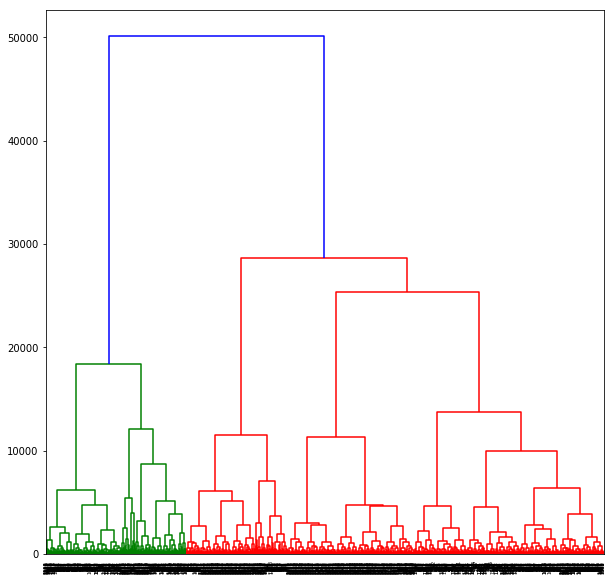

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

df = pd.read_csv('lookups/full_audio_features.csv')

df.drop(['Unnamed: 0','duration_ms','update_dttm','name',
         'artist', 'album_img', 'preview_url', 'popularity',
         'cluster'],
        axis=1, inplace=True)

df.dropna(axis=0, inplace=True)

X = df.loc[:, df.columns != 'track_id']
y = df[['track_id']]


S = sch.linkage(X, method='ward')
plt.figure(figsize=(10,10))
sch.dendrogram(S)
plt.show()

In [47]:
def get_clusters(df, num_clusters):
    clusters=num_clusters
    model = AgglomerativeClustering(n_clusters = clusters, affinity='euclidean', linkage='ward')
    model.fit(df)
    return model.labels_


In [52]:
def create_df(df, num_clusters, num_components):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=num_components)
    p_comps = pca.fit_transform(df)
    final=None
    cols = ['PC{}'.format(i+1) for i in range(num_components) ]
    final = pd.DataFrame(p_comps, columns=cols)
    final['cluster'] = get_clusters(df, num_clusters)
    return final

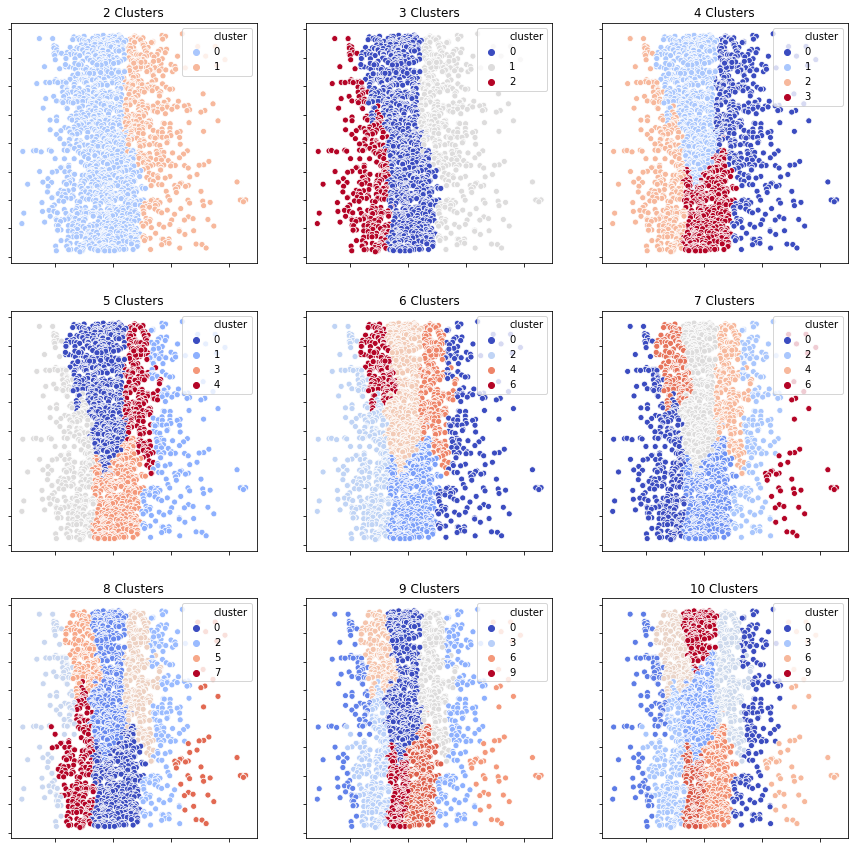

In [83]:
import seaborn as sns
num_clusters = 10
subs = num_clusters-1
cols = 3
# if plots
rows = subs//cols
rows += subs % cols
pos = range (1,subs)

fig, axs = plt.subplots(rows,cols,gridspec_kw={'width_ratios':[1 for i in range(cols)]},figsize=(15,15))

for ax,n in zip(axs.flatten(),range(2,num_clusters+1)):

    df = create_df(X, n, 2)
    sns.scatterplot(data = df, x='PC1', y='PC2', hue='cluster', palette='coolwarm', ax=ax).set(
        xlabel=None,
        ylabel=None,
        xticklabels=[],
        yticklabels=[],
        title='{} Clusters'.format(n)
        )
plt.show()